# Store US Stock Prices in HDF5 Format

## Imports

In [1]:
%matplotlib inline
import pandas as pd
from zipline.api import order, record, symbol
import matplotlib.pyplot as plt

## Load source data

In [2]:
stock_data = pd.read_csv('WIKI_PRICES.csv')

## Apply required transformations

In [3]:
required_stock_data = stock_data
required_stock_data['date'] = pd.to_datetime(required_stock_data['date'])
required_stock_data = required_stock_data[required_stock_data['date']> '2000-01-01']

In [4]:
required_stock_data2 = required_stock_data.set_index(['ticker','date'])

select_cols = ['adj_open','adj_high','adj_low','adj_close', 'adj_volume']
required_stock_data2 = required_stock_data2[select_cols]

rename_dict = {
    'adj_open': 'open'
    ,'adj_high':'high'
    ,'adj_low': 'low'
    ,'adj_close':'close'
    ,'adj_volume': 'volume'
    ,'ticker': 'ticker'
    ,'date': 'date'
}

required_stock_data2.rename(columns = rename_dict, inplace=True)

## Plot data

In [5]:
required_stock_data2[required_stock_data2.index.get_level_values('ticker') =='AAPL']

open        high         low       close       volume
ticker date                                                                   
AAPL   2000-01-03    3.369314    3.614454    3.267146    3.596463  133949200.0
       2000-01-04    3.477908    3.554053    3.251081    3.293170  128094400.0
       2000-01-05    3.333330    3.552125    3.309234    3.341362  194580400.0
       2000-01-06    3.409475    3.437748    3.052206    3.052206  191993200.0
       2000-01-07    3.100399    3.244977    3.068270    3.196784  115183600.0
...                       ...         ...         ...         ...          ...
       2018-03-21  175.040000  175.090000  171.260000  171.270000   35247358.0
       2018-03-22  170.000000  172.680000  168.600000  168.845000   41051076.0
       2018-03-23  168.390000  169.920000  164.940000  164.940000   40248954.0
       2018-03-26  168.070000  173.100000  166.440000  172.770000   36272617.0
       2018-03-27  173.680000  175.150000  166.920000  168.340000   38962839.0

[4585 rows x 5 columns]

<AxesSubplot:xlabel='ticker'>

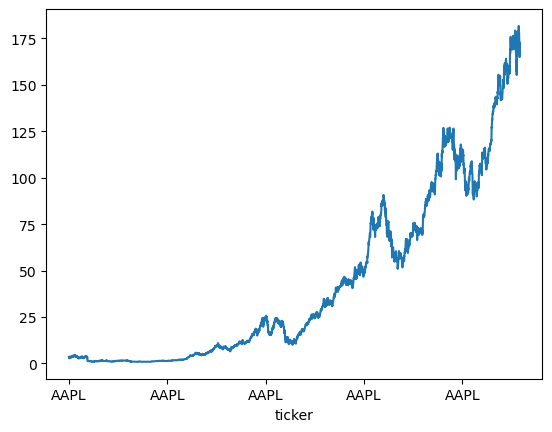

In [6]:
# plot Apple closing price
plot_data = required_stock_data2[required_stock_data2.index.get_level_values('ticker') =='AAPL']['close'].reset_index('date', drop=True)
plot_data.plot()

## Store in HDF5 format

In [7]:
required_stock_data2.to_hdf('stock_data.h5', key='data')

In [8]:
required_stock_data2=pd.read_hdf('stock_data.h5', key='data')
required_stock_data2.head()

open       high        low      close     volume
ticker date                                                             
A      2000-01-03  53.726454  53.856080  45.969377  49.121329  3343600.0
       2000-01-04  46.481058  46.992738  44.175084  45.369006  3408500.0
       2000-01-05  45.198445  45.239380  41.828176  41.998737  4119200.0
       2000-01-06  42.046493  42.298923  39.658651  40.934441  1812900.0
       2000-01-07  40.293135  44.986951  40.252200  44.345645  2016900.0